In [1]:
%matplotlib inline

In [2]:
import sys
import os

In [3]:
# optional figure parameters
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

In [4]:
import squad_reboot

## 1. Example from [SQUADTransformation.ipynb](https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUADTransformation.ipynb)

In [5]:
g = {'A': {'A': '+'}, 
     'B': {'A': '+', 'C': '-'}, 
     'C': {'A': '-', 'B': '-'}}

In [6]:
B = squad_reboot.SquadRegulatoryNetwork(g)

### Steady states

In [7]:
for s in B.bool_steady_states():
    print(s)

{'A': 0, 'B': 0, 'C': 1}
{'A': 1, 'B': 1, 'C': 0}


### Dynamic simulation

Status: End


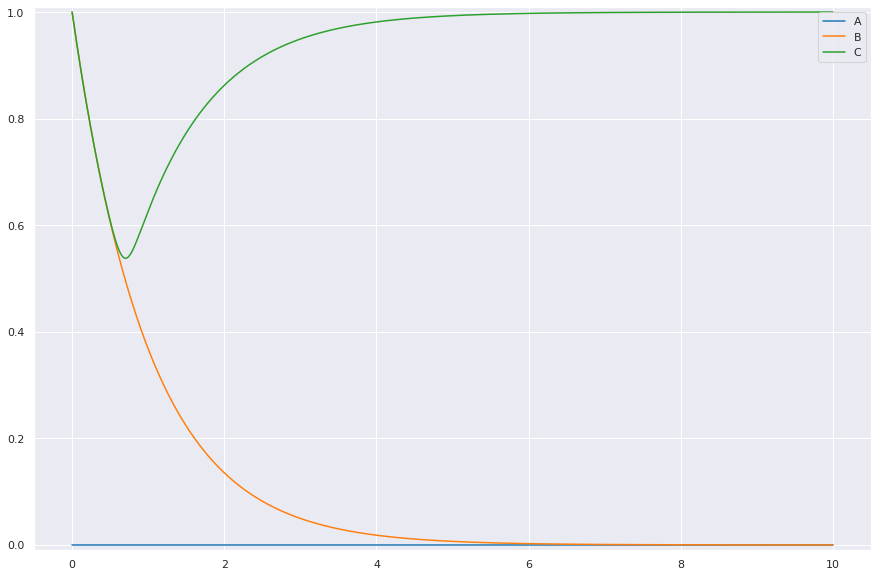

In [8]:
initial_state = {"A":0, "B":1, "C":1}
_ = B.dynamic_simulation(initial_state=initial_state, h=50, t_max=10, gamma=1)

In [9]:
from importlib import reload
reload(squad_reboot)

<module 'squad_reboot' from '/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot/__init__.py'>

## 2. Example from [SQUAD_implementation.ipynb](https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUAD_implementation.ipynb)

In [10]:
# error in original definition of graph?
g = {"A":{"A":"+", "B":"-", "X":"+"},  
     "B":{"A":"-", "Y":"+", "B":"+"}, 
     "X":{"Z":"-", "A":"+"},
     "Y":{"A":"-", "B":"+"},
     "Z":{"B":"+"}}

In [11]:
B = squad_reboot.SquadRegulatoryNetwork(g)

### Small pertubation example

Status: Event at  10:
          X -> 0.25 (duration  0)

Status: Event at  20:
          Y -> 0.25 (duration  0)

Status: End


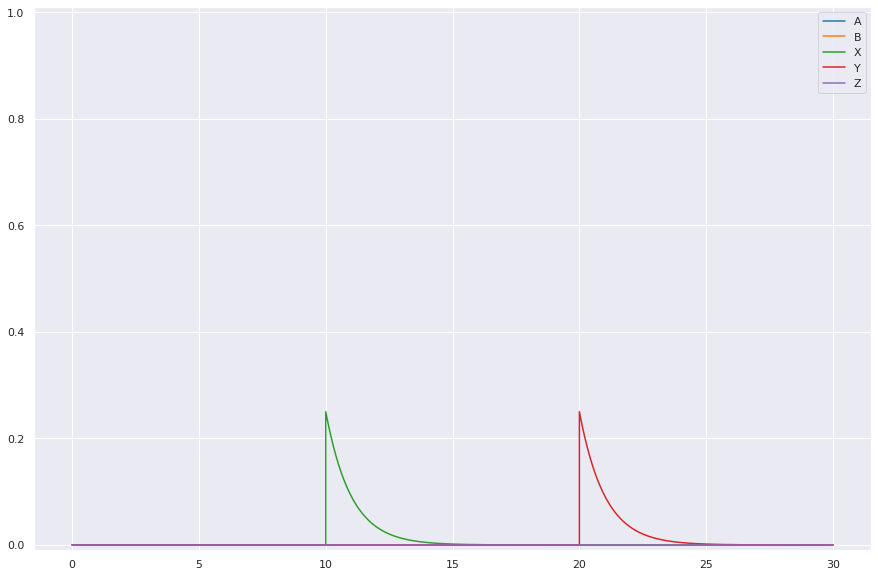

In [12]:
initial_state = 0
events = {10:{"X":{"perturbation":.25}}, 
          20:{"Y":{"perturbation":.25}}}
_ = B.dynamic_simulation(node_events=events, initial_state=initial_state, h=50, gamma=1)

### Simulate perturbations with different order of appearence and intensity

Status: Event at  10:
          X -> 1.00 (duration  0)

Status: Event at  20:
          Y -> 1.00 (duration  0)

Status: End


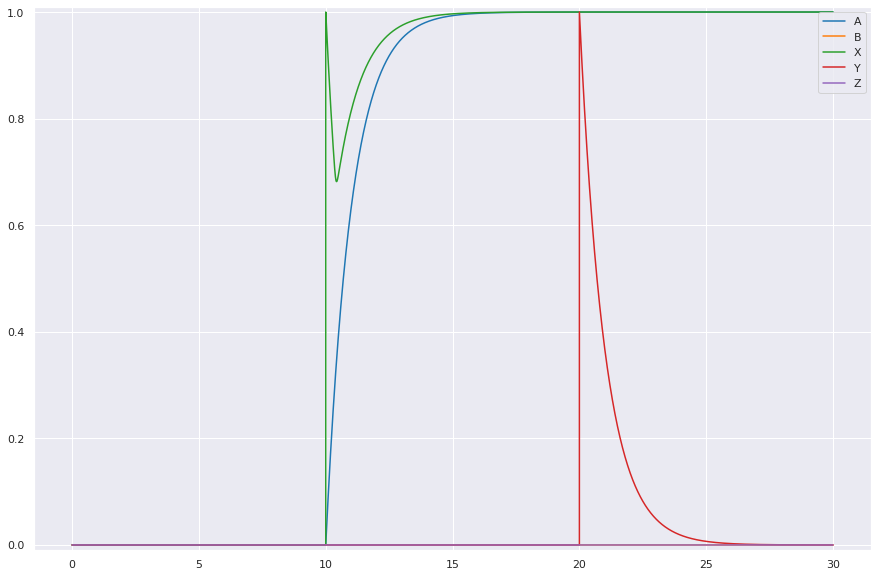

In [13]:
events = {10:{"X":{"perturbation":1}}, 
          20:{"Y":{"perturbation":1}}}
_ = B.dynamic_simulation(node_events=events, initial_state=initial_state, h=50, gamma=1)

Status: Event at  10:
          Y -> 1.00 (duration  0)

Status: Event at  20:
          X -> 1.00 (duration  0)

Status: End


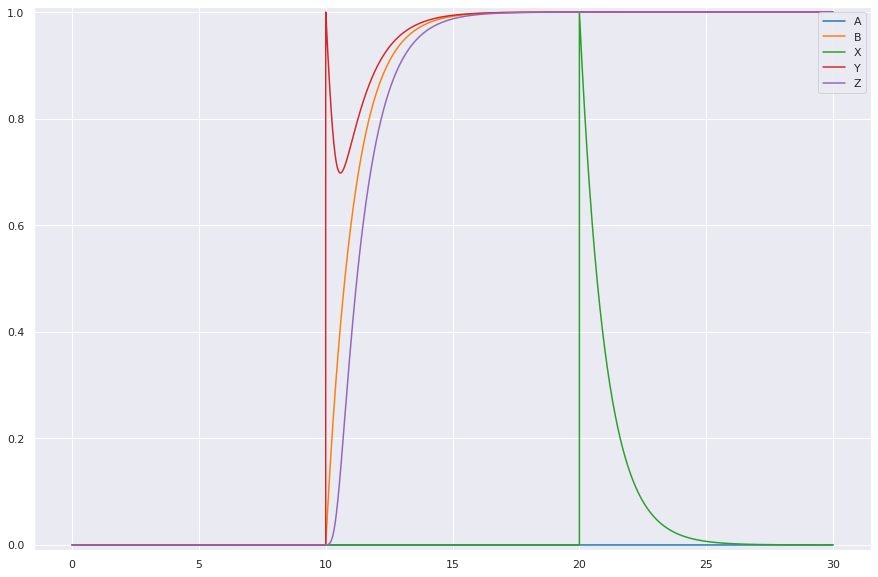

In [14]:
events = {10:{"Y":{"perturbation":1}}, 
          20:{"X":{"perturbation":1}}}
_ = B.dynamic_simulation(node_events=events, initial_state=initial_state)

### More pertubations

Status: Event at   7:
          Y -> 0.30 (duration  5)

Status: Event at   9:
          A -> 0.50 (duration  1)

Status: Event at  10:
          A -> released
          X -> 0.25 (duration  5)
          Z -> 0.00 (duration  0)

Status: Event at  12:
          Y -> released

Status: Event at  15:
          X -> released

Status: Event at  20:
          Y -> 1.00 (duration  0)

Status: End


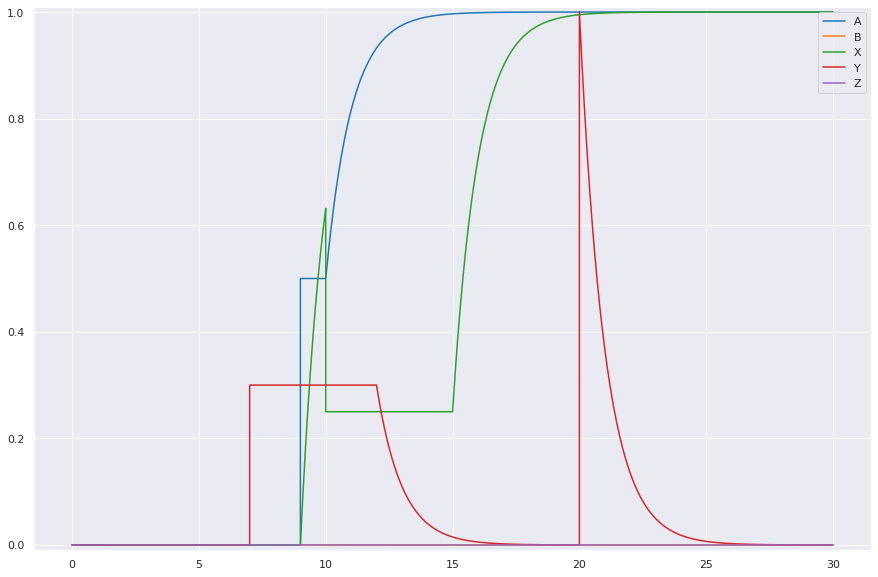

In [15]:
events = {9:{"A":{"perturbation":0.5, "duration":1}}, 
          7:{"Y":{"perturbation":0.3, "duration":5}},
          10:{"X":{"perturbation":.25, "duration":5}, "Z":{"perturbation":0}}, 
          20:{"Y":{"perturbation":1}}
         }
_ = B.dynamic_simulation(node_events=events, initial_state=initial_state, h=50, gamma=1)

### TODO: 
Terminal B cell differentiation

## A. thaliana network from graphml


In [16]:
# load graph
g_path = "./networks/Athaliana.graphml"
g = squad_reboot.import_graphml(g_path, activator_symbol="standard", inhibitor_symbol="white_diamond")
g

/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot/io.py:13: RuntimeWarning: Attribute target 'graphml' is not handled; ignoring corresponding attribute specifications at foreign-graphml.c:609
  g = ig.Graph.Read_GraphML(path)
/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot/io.py:13: RuntimeWarning: Attribute target 'port' is not handled; ignoring corresponding attribute specifications at foreign-graphml.c:615
  g = ig.Graph.Read_GraphML(path)
/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot/io.py:13: RuntimeWarning: Ignoring <key id="d6"> because of a missing or unknown 'attr.type' attribute at foreign-graphml.c:644
  g = ig.Graph.Read_GraphML(path)
/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot/io.py:13: RuntimeWarning: Ignoring <key id="d10"> because of a missing or unknown 'attr.type' attribute at foreign-graphml.c:644
  g = ig.Graph.Read_GraphML(path)
/home/cbleker/research/NIB/ADAPT/squad/squad-reboot/squad_reboot/i

{'FUL': {'AP1': '-', 'TFL1': '-'},
 'FT': {'EMF1': '-'},
 'AP1': {'AP3': '-',
  'PI': '-',
  'FT': '+',
  'TFL1': '-',
  'AG': '-',
  'LFY1': '+'},
 'EMF1': {'LFY1': '-'},
 'LFY1': {'AP1': '+', 'FUL': '+', 'TFL1': '-', 'EMF1': '-'},
 'AP2': {'TFL1': '-'},
 'WUS': {'AG': '-', 'WUS': '+', 'SEP': '-'},
 'UFO': {},
 'AP3': {'AP3': '+',
  'PI': '+',
  'AP1': '+',
  'UFO': '+',
  'AG': '+',
  'LFY1': '+',
  'SEP': '+'},
 'SEP': {'LFY1': '+'},
 'PI': {'PI': '+', 'AP1': '+', 'LFY1': '+', 'SEP': '+', 'AP3': '+', 'AG': '+'},
 'TFL1': {'AP1': '-', 'EMF1': '+', 'LFY1': '-', 'AP2': '-'},
 'AG': {'AP1': '-',
  'TFL1': '-',
  'EMF1': '-',
  'AG': '+',
  'WUS': '+',
  'LFY1': '+',
  'SEP': '+',
  'AP2': '-'}}

In [17]:
B = squad_reboot.SquadRegulatoryNetwork(g)

Status: End


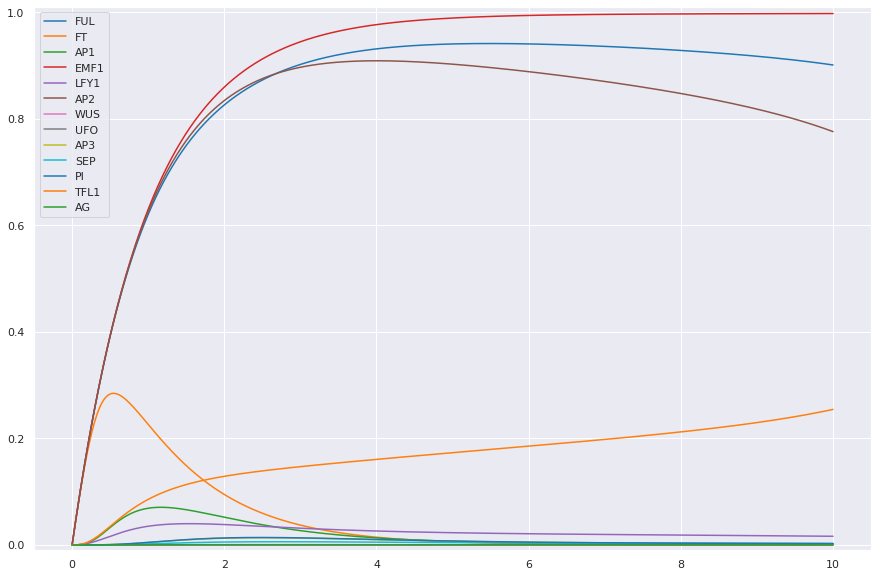

In [18]:
_ = B.dynamic_simulation(t_max=10)